In [ ]:
import os
import sys
import glob
import random
import warnings
import itertools
from tqdm import tqdm
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:

import cv2
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from IPython.display import SVG
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import Element, ElementTree

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist,cifar10
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,BatchNormalization ,Conv2D,GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop, Adam,SGD
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.losses import categorical_crossentropy,binary_crossentropy
from tensorflow.keras.callbacks import Callback,LearningRateScheduler
from tensorflow.python.client import device_lib

In [ ]:
!pip install download

In [ ]:
!pip install dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.28
    Uninstalling SQLAlchemy-2.0.28:
      Successfully uninstalled SQLAlchemy-2.0.28
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.52 which is incompatible.


In [ ]:
# CIFAR-10 클래스
CIFAR10_CLASSES = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
from keras.datasets import cifar10

# CIFAR-10 데이터 불러오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Train / Validation 데이터 분리하기
num_train = int(x_train.shape[0] * 0.8)
num_val = x_train.shape[0] - num_train

# Validation 데이터 생성
x_val = x_train[num_train:]
y_val = y_train[num_train:]

# Train 데이터 수정
x_train = x_train[:num_train]
y_train = y_train[:num_train]


170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(40000, 1)
(10000, 1)
(10000, 1)
(40000, 10)
(10000, 10)
(10000, 10)


In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
# from data_utils import *
import tensorflow_datasets as tfds
%matplotlib inline
plt.rcParams['figure.figsize']=(10.0,8.0)
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['image.cmap']='gray'

import tensorflow as tf
from keras import backend as k
import os

%load_ext autoreload
%autoreload 2

In [ ]:
from keras.models import Model
from keras import Input
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Activation
from keras import regularizers
from keras.layers import AveragePooling2D
from keras.layers import GlobalAveragePooling2D

In [ ]:
def conv2d_bn_relu(model, filters, block_index, layer_index,weight_decay=.0,padding='same'):
  conv_name = 'conv'+str(block_index)+'-'+str(layer_index)
  model = Conv2D(filters=filters, kernel_size=(3, 3), padding=padding, kernel_regularizer=regularizers.l2(weight_decay),strides=(1,1),name=conv_name,)(model)
  bn_name = 'bn'+str(block_index)+'-'+str(layer_index)
  model = BatchNormalization(name=bn_name)(model)
  relu_name = 'relu'+str(block_index)+'-'+str(layer_index)
  model = Activation('relu',name=relu_name)(model)
  return model
def dense2d_bn_dropout(model,units,weight_decay,name):
  model = Dense(units, kernel_regularizer=regularizers.l2(weight_decay),name=name,)(model)
  model = BatchNormalization(name=name+'-bn')(model)
  model = Activation('relu',name=name+'-relu')(model)
  model = Dropout(0.5,name=name+'-dropout')(model)
  return model

In [ ]:
def VGGNet(classes,input_shape,weight_decay,conv_block_num=5,fc_layers=2,fc_units=4096):
  input = Input(shape=input_shape)
  #block1
  x = conv2d_bn_relu(model=input,filters=64,block_index=1,layer_index=1,weight_decay=weight_decay)
  x = tf.keras.layers.add([x, Dropout(0.3)(x)])
  x = conv2d_bn_relu(model=x,filters=64,block_index=1,layer_index=2,weight_decay=weight_decay)
  x = MaxPool2D(name='pool1')(x)
  #block2
  if conv_block_num >= 2:
    x = conv2d_bn_relu(x,filters=128,block_index=2,layer_index=1,weight_decay=weight_decay)
    x = tf.keras.layers.add([x, Dropout(0.4)(x)])
    x = conv2d_bn_relu(x,filters=128,block_index=2,layer_index=2,weight_decay=weight_decay)
    x = MaxPool2D(name='pool2')(x)
  #block3
  if conv_block_num >= 3:
    x = conv2d_bn_relu(x,filters=256,block_index=3,layer_index=1,weight_decay=weight_decay)
    x = tf.keras.layers.add([x, Dropout(0.4)(x)])
    x = conv2d_bn_relu(x,filters=256,block_index=3,layer_index=2,weight_decay=weight_decay)
    x = tf.keras.layers.add([x, Dropout(0.4)(x)])
    x = conv2d_bn_relu(x,filters=256,block_index=3,layer_index=3,weight_decay=weight_decay)
    x = MaxPool2D(name='pool3')(x)
  #block4
  if conv_block_num >= 4:
    x = conv2d_bn_relu(x,filters=512,block_index=4,layer_index=1,weight_decay=weight_decay)
    x = tf.keras.layers.add([x, Dropout(0.4)(x)])
    x = conv2d_bn_relu(x,filters=512,block_index=4,layer_index=2,weight_decay=weight_decay)
    x = tf.keras.layers.add([x, Dropout(0.4)(x)])
    x = conv2d_bn_relu(x,filters=512,block_index=4,layer_index=3,weight_decay=weight_decay)
    x = MaxPool2D(name='pool4')(x)
  #block5
  if conv_block_num >= 5:
    x = conv2d_bn_relu(x,filters=512,block_index=5,layer_index=1,weight_decay=weight_decay)
    x = tf.keras.layers.add([x, Dropout(0.4)(x)])
    x = conv2d_bn_relu(x,filters=512,block_index=5,layer_index=2,weight_decay=weight_decay)
    x = tf.keras.layers.add([x, Dropout(0.4)(x)])
    x = conv2d_bn_relu(x,filters=512,block_index=5,layer_index=3,weight_decay=weight_decay)
    x = MaxPool2D(name='pool5')(x)

  x = Flatten(name='flatten')(x)
  if fc_layers>=1:
    x = dense2d_bn_dropout(x,fc_units,weight_decay,name='fc6')
    if fc_layers>=2:
      x = dense2d_bn_dropout(x,fc_units,weight_decay,name='fc7')
  out = Dense(classes,activation='softmax',name='predictions')(x)
  model = Model(input,out)
  return model

In [ ]:
def VGG16(classes):
  return VGGNet(classes,weight_decay=1e-6,conv_block_num=5,fc_layers=2,fc_units=4096) # weight_decay수정

In [ ]:
from keras.applications import VGG16

weight_decay=5e-4
lr = 0.1 #learning_rate수정
num_classes =10

vgg = VGGNet(classes = num_classes,input_shape=x_train.shape[1:],weight_decay=weight_decay,conv_block_num=5,fc_layers=2,fc_units=512)

#sgd
opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9, nesterov=True)#nesterov(False->True)수정
vgg.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
vgg.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1-1 (Conv2D)            (None, 32, 32, 64)           1792      ['input_1[0][0]']             
                                                                                                  
 bn1-1 (BatchNormalization)  (None, 32, 32, 64)           256       ['conv1-1[0][0]']             
                                                                                                  
 relu1-1 (Activation)        (None, 32, 32, 64)           0         ['bn1-1[0][0]']               
                                                                                              

In [ ]:
%%time
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler
data_augmentation = True
from keras.callbacks import ReduceLROnPlateau

def lr_schedule(epoch):
  return lr * (0.5 ** (epoch//20)) #lr_drop수정
reduce_lr = LearningRateScheduler(lr_schedule)

batch_size =128
epochs = 250

CPU times: user 27 µs, sys: 0 ns, total: 27 µs
Wall time: 30.3 µs


In [ ]:
if data_augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=False
    )
    print('train with data_augumentation')
    history = vgg.fit_generator(generator=datagen.flow(x_train, y_train, batch_size=batch_size),
                                steps_per_epoch=len(x_train) // batch_size,
                                epochs=epochs,
                                callbacks=[reduce_lr],
                                validation_data=(x_val, y_val))
else:
    print('train without data_augumentation')
    history = vgg.fit(x_train, y_train, batch_size=batch_size,
                      epochs=epochs,
                      callbacks=[reduce_lr],
                      validation_data=(x_val, y_val))


train with data_augumentation
Epoch 1/250


<ipython-input-16-e85a00949fe3>:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = vgg.fit_generator(generator=datagen.flow(x_train, y_train, batch_size=batch_size),


312/312 [==============================] - 53s 125ms/step - loss: 6.8371 - accuracy: 0.1752 - val_loss: 5.6048 - val_accuracy: 0.1512 - lr: 0.1000
Epoch 2/250
312/312 [==============================] - 35s 113ms/step - loss: 4.3162 - accuracy: 0.2924 - val_loss: 4.1549 - val_accuracy: 0.1390 - lr: 0.1000
Epoch 3/250
312/312 [==============================] - 33s 105ms/step - loss: 3.0690 - accuracy: 0.3609 - val_loss: 3.3164 - val_accuracy: 0.1698 - lr: 0.1000
Epoch 4/250
312/312 [==============================] - 32s 103ms/step - loss: 2.3536 - accuracy: 0.4268 - val_loss: 2.4513 - val_accuracy: 0.3030 - lr: 0.1000
Epoch 5/250
312/312 [==============================] - 32s 104ms/step - loss: 1.9277 - accuracy: 0.5010 - val_loss: 2.0141 - val_accuracy: 0.4257 - lr: 0.1000
Epoch 6/250
312/312 [==============================] - 35s 113ms/step - loss: 1.6571 - accuracy: 0.5707 - val_loss: 1.8188 - val_accuracy: 0.5186 - lr: 0.1000
Epoch 7/250
312/312 [==============================] - 35s

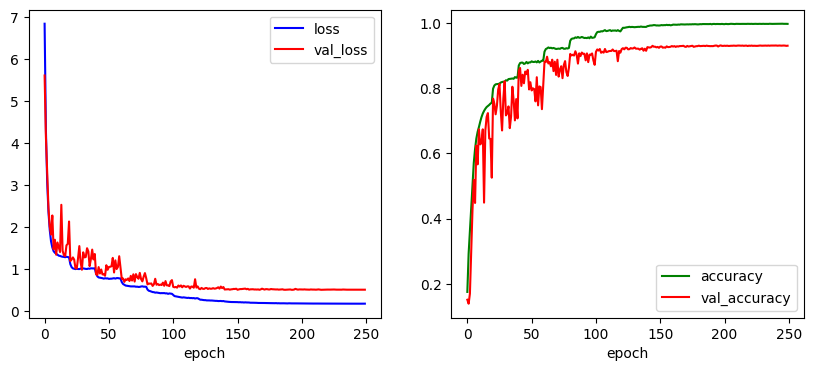

In [ ]:
# Plot Convergence Graph and compare the results
# plot loss and accuracy
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='val_accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()

In [ ]:
loss,acc = vgg.evaluate(x_test,y_test)
print('evaluate loss:%f acc %f'%(loss,acc))

313/313 [==============================] - 3s 10ms/step - loss: 0.5266 - accuracy: 0.9317
evaluate loss:0.526583 acc 0.931700
